<a href="https://colab.research.google.com/github/LuscasSkywalka/PyTorch-curso/blob/main/PyTorch_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import torch

X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


In [2]:
import torch
import torch.nn as nn

class MoonClassifier(nn.Module):
    def __init__(self):
        super(MoonClassifier, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 2)
        )

    def forward(self, x):
        return self.model(x)


In [3]:
model = MoonClassifier()

print(model)

dummy_input = torch.rand(1, 2)
output = model(dummy_input)
print("Output logits:", output)


MoonClassifier(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=2, bias=True)
  )
)
Output logits: tensor([[-0.3218,  0.1431]], grad_fn=<AddmmBackward0>)


In [4]:
import torch.nn as nn
import torch.optim as optim

model = MoonClassifier()

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.01)


In [9]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

class MoonClassifier(nn.Module):
    def __init__(self):
        super(MoonClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 2)
        )

    def forward(self, x):
        return self.model(x)

def accuracy(preds, labels):
    predicted_classes = preds.argmax(dim=1)
    correct = (predicted_classes == labels).sum().item()
    return correct / len(labels)

model = MoonClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 200

for epoch in range(1, epochs + 1):

    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        train_outputs = model(X_train_tensor)
        train_loss = criterion(train_outputs, y_train_tensor).item()
        train_acc = accuracy(train_outputs, y_train_tensor)

        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor).item()
        test_acc = accuracy(test_outputs, y_test_tensor)

    if epoch % 10 == 0 or test_acc > 0.96:
        print(f"Epoch {epoch}:")
        print(f"  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
        print(f"  Test  Loss: {test_loss:.4f}, Test  Acc: {test_acc:.4f}")
        print("-" * 40)

    if test_acc > 0.96:
        print(f"✅ Reached >96% test accuracy at epoch {epoch}")
        break


Epoch 10:
  Train Loss: 0.4659, Train Acc: 0.7738
  Test  Loss: 0.4887, Test  Acc: 0.7100
----------------------------------------
Epoch 20:
  Train Loss: 0.2964, Train Acc: 0.8313
  Test  Loss: 0.3148, Test  Acc: 0.8150
----------------------------------------
Epoch 30:
  Train Loss: 0.1818, Train Acc: 0.9237
  Test  Loss: 0.1802, Test  Acc: 0.9300
----------------------------------------
Epoch 40:
  Train Loss: 0.1295, Train Acc: 0.9475
  Test  Loss: 0.1210, Test  Acc: 0.9550
----------------------------------------
Epoch 44:
  Train Loss: 0.1128, Train Acc: 0.9537
  Test  Loss: 0.1032, Test  Acc: 0.9700
----------------------------------------
✅ Reached >96% test accuracy at epoch 44


In [6]:
def tanh_manual(x):
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))
x = torch.tensor([-2.0, -1.0, 0.0, 1.0, 2.0])
print("Manual Tanh:", tanh_manual(x))
print("PyTorch nn.Tanh:", torch.tanh(x))  # Should match


Manual Tanh: tensor([-0.9640, -0.7616,  0.0000,  0.7616,  0.9640])
PyTorch nn.Tanh: tensor([-0.9640, -0.7616,  0.0000,  0.7616,  0.9640])


Epoch 10: Train Acc: 0.6458 | Test Acc: 0.6000
Epoch 20: Train Acc: 0.7472 | Test Acc: 0.7333
Epoch 30: Train Acc: 0.9375 | Test Acc: 0.9222
Epoch 34: Train Acc: 0.9528 | Test Acc: 0.9556
✅ Reached >95% test accuracy at epoch 34


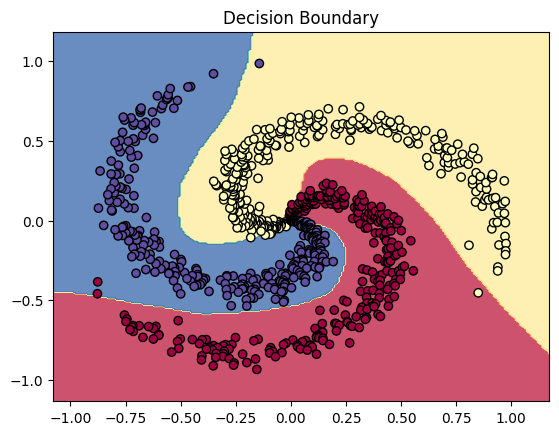

In [11]:
import numpy as np
import matplotlib.pyplot as plt
def generate_spiral_data(points_per_class=100, num_classes=3):
    N = points_per_class
    D = 2
    K = num_classes
    X = np.zeros((N*K, D), dtype=np.float32)
    y = np.zeros(N*K, dtype=np.int64)
    for j in range(K):
        ix = range(N*j, N*(j+1))
        r = np.linspace(0.0, 1, N)
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    return X, y

X_np, y_np = generate_spiral_data(points_per_class=300, num_classes=3)
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

class SpiralNet(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=64, output_dim=3):
        super(SpiralNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.net(x)

model = SpiralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

def accuracy(preds, labels):
    return (preds.argmax(dim=1) == labels).float().mean().item()

epochs = 300

for epoch in range(1, epochs + 1):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    model.eval()
    with torch.no_grad():
        train_preds = model(X_train_tensor)
        train_acc = accuracy(train_preds, y_train_tensor)
        test_preds = model(X_test_tensor)
        test_acc = accuracy(test_preds, y_test_tensor)

    if epoch % 10 == 0 or test_acc > 0.95:
        print(f"Epoch {epoch}: Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

    if test_acc > 0.95:
        print(f"✅ Reached >95% test accuracy at epoch {epoch}")
        break

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:,0].min() - 0.2, X[:,0].max() + 0.2
    y_min, y_max = X[:,1].min() - 0.2, X[:,1].max() + 0.2
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)

    with torch.no_grad():
        Z = model(grid_tensor)
        Z = Z.argmax(dim=1).numpy()

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(model, X_np, y_np)


